# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

from PIL import Image, ImageOps

# Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# Analyzing the data

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

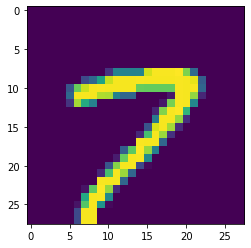

In [6]:
plt.imshow(x_train[123])

# Data Pre-processing

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Creating the model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

# Training the model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 4ms/step - loss: 0.1559 - accuracy: 0.9560 - val_loss: 0.0648 - val_accuracy: 0.9784
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9815 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0718 - val_accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0692 - val_accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0776 - val_accuracy: 0.9802


# Saving the model

In [17]:
model.save("model.h5")

In [30]:
# Saving in tar

!tar -zcvf Handwritten_Digit_Recognition.tgz model.h5

model.h5


# IBM Deployment

In [18]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 31.3 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 132 kB 67.4 MB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 9.9 MB 69.1 MB/s 
     |████████████████████████████████| 140 kB 69.5 MB/s 
     |████████████████████████████████| 956 kB 61.1 MB/s 
     |████████████████████████████████| 135 kB 67.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=dde75480aa1a5f7209052e87266670eb72dddda4e44c75d740b8cd0381c73b7c
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=d9eeff8ce

In [19]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 34.0 MB/s 
     |████████████████████████████████| 51 kB 748 kB/s 
     |████████████████████████████████| 824 kB 55.9 MB/s 
     |████████████████████████████████| 133 kB 69.1 MB/s 
     |████████████████████████████████| 547 kB 66.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=e1bbaf75bdaed62c3037dce6608a560822f94bc46800be36a1ae467569ae61e5
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=befd1c288c9b63d576415c080bb2f9357adb696e025502974207d21f4923f883
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [21]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "apikey": ""
}

client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [22]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/0099690998344e7b8208cc1fb401bd5f:c31e6fd7-61ee-4e85-9bdc-44700d3ddc4f::',
      'guid': 'c31e6fd7-61ee-4e85-9bdc-44700d3ddc4f',
      'name': 'Watson Machine Learning-3l',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Handwritten Digit Recognition',
    'scope': {'bss_account_id': '0099690998344e7b8208cc1fb401bd5f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '7cbf8c51-e5a5-4794-bad7-ae1b5a3c9efd',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '326d32df820e491d9e94e19150a6cf5c',
        'api_key': 'AEZQRPmnnShF4qfqgfVMPXirM1iTWUWRpWccOtN32sPu',
        'secret_access_key': '9590302866ae28e2bbaf3e191c377f0ea14df6853b5e7018',
        'service_id': 'ServiceId-3400c39e-0533-4562-a39b-522555656950'},
       'editor': {'access_key_id': '4e0e9d18dbb2478f9f318b397e4d6ac

In [25]:
def guid_space_name(client, Handwritten_Digit_Recognition):
  space = client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==Handwritten_Digit_Recognition)['metadata']['id'])

space_uid = guid_space_name(client, 'Handwritten Digit Recognition')
space_uid

'b6e4d602-5eb0-43ce-ada0-3f0dcd95cb43'

In [26]:
client.set.default_space(space_uid)

'SUCCESS'

In [27]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [28]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [35]:
model_details = client.repository.store_model(model='Handwritten_Digit_Recognition.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:'Handwritten Digit Recognition',
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})

In [36]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T00:41:59.387Z',
  'id': 'b5a61208-a7dc-4cce-b8e9-acec041f4561',
  'modified_at': '2022-11-18T00:42:02.666Z',
  'name': 'Handwritten Digit Recognition',
  'owner': 'IBMid-667000FO18',
  'resource_key': '10345caa-76bd-49c8-a928-41655db97de8',
  'space_id': 'b6e4d602-5eb0-43ce-ada0-3f0dcd95cb43'},
 'system': {'warnings': []}}

In [37]:
model_id = client.repository.get_model_id(model_details)
model_id

'b5a61208-a7dc-4cce-b8e9-acec041f4561'

In [38]:
client.repository.download(model_id, 'IBMHandwrittenDigitRecognition.tar.gb')

Successfully saved model content to file: 'IBMHandwrittenDigitRecognition.tar.gb'


'/content/IBMHandwrittenDigitRecognition.tar.gb'